Welcome to your DataCamp project audition! This notebook must be filled out and vetted before a contract can be signed and you can start creating your project.

The first step is forking the repository in which this notebook lives. After that, there are two parts to be completed in this notebook:

- **Project information**:  The title of the project, a project description, etc.

- **Project introduction**: The three first text and code cells that will form the introduction of your project.

When complete, please email the link to your forked repo to projects@datacamp.com with the email subject line _DataCamp project audition_. If you have any questions, please reach out to projects@datacamp.com.

# Project information

**Project title**: Is Physical Activity Associated with Lower BMI? Health Survey Says...

**Name:** Jessica Minnier

**Email address associated with your DataCamp account:** jessica.minnier@gmail.com

**Project description**:

Surveys are often used to study health behavior and determine risks of disease. Meanwhile, seemingly every day, news outlets publish a different "research says" article about how to lose weight (fast! with no effort at all!). In this project, you will use survey data of ~20k people sampled from the United States to explore health behaviors associated with lower Body Mass Index (BMI), a standardized measure of healthy weight and obesity. Surveys with complex designs use special statistical methods to incorporate sampling weights and design factors into the estimation and inference. Incorporating survey design methods, you will use multiple regression to handle confounders when testing whether physical activity is associated with lower BMI.

You will apply the skills you learned in [Analyzing Survey Data in R](https://www.datacamp.com/courses/analyzing-survey-data-in-r), [Multiple and Logistic Regression](https://www.datacamp.com/courses/multiple-and-logistic-regression), as well as tidy data exploration and ggplot2 visualization techniques found in [Introduction to the Tidyverse](https://www.datacamp.com/courses/introduction-to-the-tidyverse) and [Data Manipulation in R with dplyr](https://www.datacamp.com/courses/dplyr-data-manipulation-r-tutorial).

This project will use [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/nchs/nhanes/index.htm) data from ~20,000 participants surveyed in years 2009-2012 found in the [NHANES R package](https://www.rdocumentation.org/packages/NHANES/versions/2.1.0/topics/NHANES).

# Project introduction

***Note: nothing needs to be filled out in this cell. It is simply setting up the template cells below.***

The final output of a DataCamp project looks like a blog post: pairs of text and code cells that tell a story about data. The text is written from the perspective of the data analyst and *not* from the perspective of an instructor on DataCamp. So, for this blog post intro, all you need to do is pretend like you're writing a blog post -- forget the part about instructors and students.

Below you'll see the structure of a DataCamp project: a series of "tasks" where each task consists of a title, a **single** text cell, and a **single** code cell. There are 8-12 tasks in a project and each task can have up to 10 lines of code. What you need to do:
1. Read through the template structure.
2. As best you can, divide your project as it is currently visualized in your mind into tasks.
3. Fill out the template structure for the first three tasks of your project.

As you are completing each task, you may wish to consult the project notebook format in our [documentation](https://instructor-support.datacamp.com/projects/datacamp-projects-jupyter-notebook). Only the `@context` and `@solution` cells are relevant to this audition.

## 1. Survey of BMI and physical activity

The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/nchs/nhanes/index.htm) data is a complex survey designed to assess the health and nutritional status of adults and children in the United States. There are data from many questionnaires, including health and disease outcomes such as diabetes, physical activity and diet measures, lab tests, physchological health, socioeconomic factors, and much more. We are going to focus on a common health indicator, BMI, and how it is related to physical activity. We'll visualize the data and use survey weighted regression to test for associations.

The [`NHANES` R package](https://www.rdocumentation.org/packages/NHANES/versions/2.1.0/topics/NHANES) has a subset of the NHANES data from years 2009-2012. Load the R dataset `NHANESraw` from the NHANES package.

Surveys represent larger populations (i.e. all users of a website, everyone with heart disease in Brazil), and depending on the sampling design, each person has a different weight that quantifies how many people in the population their data is meant to represent. In the `NHANESraw` data, we have a sampling weight variable `WTMEC2YR`, a strata variable `SDMVSTRA`, and `SDMVPSU`, a primary sampling unit (PSU) variable that accounts for design effects of clustering. These PSUs are nested within strata.

![activity](img/Activity-Flexibility-Wife-Women-Bending-Stretching-3098228.jpg)

In [12]:
# Load libraries
library(NHANES)
library(survey)
library(dplyr)
library(ggplot2)

# Code and comments for the first task
# It should consist of up to 10 lines of code (not including comments)
# and take at most 10 seconds to execute on an average laptop.

# load the NHANESraw data
data("NHANESraw")

# glimpse the data
glimpse(NHANESraw)

Observations: 20,293
Variables: 78
$ ID               <int> 51624, 51625, 51626, 51627, 51628, 51629, 51630, 5...
$ SurveyYr         <fct> 2009_10, 2009_10, 2009_10, 2009_10, 2009_10, 2009_...
$ Gender           <fct> male, male, male, male, female, male, female, fema...
$ Age              <int> 34, 4, 16, 10, 60, 26, 49, 1, 10, 80, 10, 80, 4, 3...
$ AgeMonths        <int> 409, 49, 202, 131, 722, 313, 596, 12, 124, NA, 121...
$ Race1            <fct> White, Other, Black, Black, Black, Mexican, White,...
$ Race3            <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ Education        <fct> High School, NA, NA, NA, High School, 9 - 11th Gra...
$ MaritalStatus    <fct> Married, NA, NA, NA, Widowed, Married, LivePartner...
$ HHIncome         <fct> 25000-34999, 20000-24999, 45000-54999, 20000-24999...
$ HHIncomeMid      <int> 30000, 22500, 50000, 22500, 12500, 30000, 40000, 4...
$ Poverty          <dbl> 1.36, 1.07, 2.27, 0.81, 0.69, 1.01, 1.91, 1.36, 2....
$ HomeRooms      

## 2. Visualize survey weight and strata variables

Since `NHANESraw` data spans 4 years and the sampling weights are based on 2 year data, we first need to create a weight variable that scales the sample across the full 4 years. We divide the 2 year weight by 2, so that in total, the weights sum to the total US population.

The NHANES data has oversampled some geographic regions and specific minority groups. By examining the distribution of sampling weights for each race, we can see that Whites are undersampled and have higher weights while oversampled Black, Mexican, Hispanic people have lower weights since each sampled person in these minority groups represents fewer US people.

sum(WTMEC4YR)
304267200


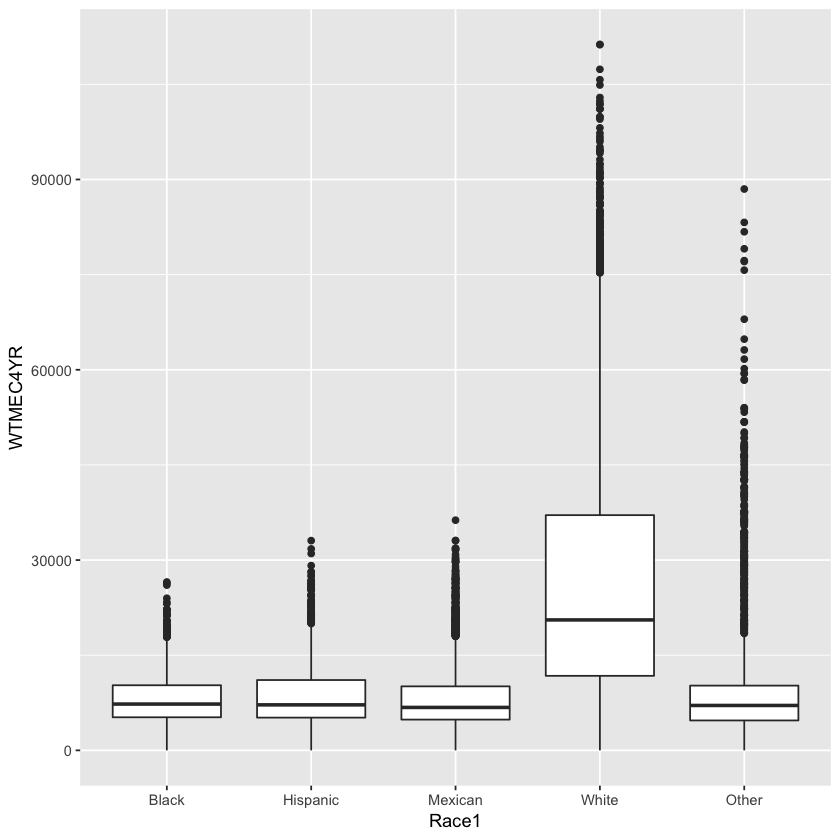

In [14]:
# use mutate to create a 4 year weight variable WTMEC4YR
NHANESraw <- NHANESraw %>% mutate(WTMEC4YR = WTMEC2YR/2)

# calculate the sum of this weight variable
NHANESraw %>% summarize(sum(WTMEC4YR))

# plot the sample weights using boxplots, with Race1 on the x axis
ggplot(NHANESraw,aes(x=Race1,y=WTMEC4YR))+geom_boxplot()


## 3. Specify survey design and subset

We will now use the `survey` package to specify the complex survey design that we will use in later analyses. We know the strata, cluster (PSU), and weight variables for our data. We also know that the clusters (PSUs) are nested within strata. For more information on the NHANES sampling design, see the [CDC website](https://www.cdc.gov/Nchs/tutorials/environmental/orientation/sample_design/index.htm).

We want to study the relationship between physical activity and BMI in adults. Note, when we wish to examine a subset of the data (i.e. the subpopulation of adult Hispanics with diabetes, or pregnant women) we must explicitly specify this in the design. We cannot simply remove that subset of the data through filtering the raw data because the survey weights will no longer be correct and will not add up to the full US population.

In [18]:
# specify the survey design using svydesign(), note that id is asking for our cluster variable
nhanes_design <- svydesign(data = NHANESraw, 
                           strata = ~SDMVSTRA, 
                           id = ~SDMVPSU, 
                           nest = TRUE, 
                           weights = ~WTMEC4YR)

# print a summary of this design
summary(nhanes_design)

# use the subset() function to select adults of Age >= 18
nhanes_adult <- subset(nhanes_design, Age>=18)

# print a summary of this subset; notice how the number of observations per stratum decreases
summary(nhanes_adult)

Stratified 1 - level Cluster Sampling design (with replacement)
With (62) clusters.
svydesign(data = NHANESraw, strata = ~SDMVSTRA, id = ~SDMVPSU, 
    nest = TRUE, weights = ~WTMEC4YR)
Probabilities:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
8.986e-06 5.664e-05 1.054e-04       Inf 1.721e-04       Inf 
Stratum Sizes: 
            75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
obs        803 785 823 829 696 751 696 724 713 683 592 946 598 647 251 862 998
design.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
actual.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
            92  93  94  95  96  97  98  99 100 101 102 103
obs        875 602 688 722 676 608 708 682 700 715 624 296
design.PSU   3   2   2   2   2   2   2   2   2   2   2   2
actual.PSU   3   2   2   2   2   2   2   2   2   2   2   2
Data variables:
 [1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeMon

Stratified 1 - level Cluster Sampling design (with replacement)
With (62) clusters.
subset(nhanes_design, Age >= 18)
Probabilities:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
8.986e-06 4.464e-05 8.321e-05       Inf 1.272e-04       Inf 
Stratum Sizes: 
            75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
obs        492 510 544 529 426 488 467 422 432 422 370 543 342 374 166 543 586
design.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
actual.PSU   2   2   2   2   2   2   2   2   2   2   2   3   2   2   2   3   3
            92  93  94  95  96  97  98  99 100 101 102 103
obs        507 395 390 473 377 333 427 427 399 510 322 175
design.PSU   3   2   2   2   2   2   2   2   2   2   2   2
actual.PSU   3   2   2   2   2   2   2   2   2   2   2   2
Data variables:
 [1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeMonths"        "Race1"            "Race3"            "Education"       


[1] 20293

*Stop here! Only the three first tasks. :)*